<a href="https://colab.research.google.com/github/tanvir-talha058/Machine-Learning/blob/main/snake_gourd_second.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Organize the Dataset
Ensure your dataset is structured in directories corresponding to each category:

train folder: Contains images for training the model.
val folder: Contains images for validation during training to monitor performance.
test folder: Contains images for evaluating the final model after training.

Step 2: Load and Preprocess Data
Use TensorFlow's image_dataset_from_directory method to load images from your dataset directories. The images will be automatically resized and converted to batches suitable for model training.

Code for Loading and Preprocessing Dataset

In [3]:
import tensorflow as tf
import os

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define image size and batch size
IMG_SIZE = (224, 224)  # Resize all images to 224x224
BATCH_SIZE = 32

# Path to your dataset on Google Drive
# Replace with the actual path to your dataset folder
DATA_DIR = '/content/drive/My Drive/dataset'

# Construct the absolute paths to the data directories
train_dir = os.path.join(DATA_DIR, 'train')
val_dir = os.path.join(DATA_DIR, 'validation')
test_dir = os.path.join(DATA_DIR, 'test')

# Check if the directories exist
if not os.path.exists(train_dir):
    raise FileNotFoundError(f"Training data directory not found: {train_dir}")
if not os.path.exists(val_dir):
    raise FileNotFoundError(f"Validation data directory not found: {val_dir}")
if not os.path.exists(test_dir):
    raise FileNotFoundError(f"Test data directory not found: {test_dir}")

# Load datasets
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,  # Training dataset directory
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical",  # One-hot encode labels
    shuffle=True  # Shuffle data for better training
)

val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,  # Validation dataset directory
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical"
)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,  # Test dataset directory
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical"
)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 3109 files belonging to 4 classes.
Found 820 files belonging to 4 classes.
Found 150 files belonging to 4 classes.


Step 3: Define and Prepare Models
Implement multiple models for comparison, including:

Dense Neural Network (DNN): A fully connected network for simple datasets.
Convolutional Neural Network (CNN): A network with convolutional layers for image recognition.
Pretrained Models (VGG16, ResNet50, MobileNetV2): Transfer learning with pretrained base models.
Code for Model Definitions

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.applications import VGG16, ResNet50, MobileNetV2

# 1. Dense Neural Network (DNN)
def create_dnn(input_shape, num_classes):
    model = Sequential([
        Flatten(input_shape=input_shape),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])
    return model

# 2. Convolutional Neural Network (CNN)
def create_cnn(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])
    return model

# 3. Pretrained Models
def create_pretrained_model(base_model_fn, input_shape, num_classes):
    base_model = base_model_fn(include_top=False, input_shape=input_shape, weights='imagenet')
    model = Sequential([
        base_model,
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])
    base_model.trainable = False  # Freeze the base model
    return model


Step 4: Prepare Models for Training
Initialize all models with the required input shape and number of output classes.

Code for Model Preparation

In [5]:
class_names = train_dataset.class_names  # Access before prefetch
val_class_names = val_dataset.class_names  # (if applicable)
test_class_names = test_dataset.class_names  # (if applicable)

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

# Print class names for verification
print("Class Names:", class_names)
print("Validation Class Names:", val_class_names)
print("Test Class Names:", test_class_names)

# Retrieve class names and number of classes
class_names = class_names
num_classes = len(class_names)

# Print class names for verification
print("Class Names:", class_names)


# Prepare models
models = {}
models['DNN'] = create_dnn(input_shape, num_classes)
models['CNN'] = create_cnn(input_shape, num_classes)
models['VGG16'] = create_pretrained_model(VGG16, input_shape, num_classes)
models['ResNet50'] = create_pretrained_model(ResNet50, input_shape, num_classes)
models['MobileNetV2'] = create_pretrained_model(MobileNetV2, input_shape, num_classes)



NameError: name 'AUTOTUNE' is not defined

In [6]:
# ipython-input-3-57fff52446ea
import tensorflow as tf
import os

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define image size and batch size
IMG_SIZE = (224, 224)  # Resize all images to 224x224
BATCH_SIZE = 32

# Path to your dataset on Google Drive
# Replace with the actual path to your dataset folder
DATA_DIR = '/content/drive/My Drive/dataset'

# Construct the absolute paths to the data directories
train_dir = os.path.join(DATA_DIR, 'train')
val_dir = os.path.join(DATA_DIR, 'validation')
test_dir = os.path.join(DATA_DIR, 'test')

# Check if the directories exist
if not os.path.exists(train_dir):
    raise FileNotFoundError(f"Training data directory not found: {train_dir}")
if not os.path.exists(val_dir):
    raise FileNotFoundError(f"Validation data directory not found: {val_dir}")
if not os.path.exists(test_dir):
    raise FileNotFoundError(f"Test data directory not found: {test_dir}")

# Load datasets
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,  # Training dataset directory
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical",  # One-hot encode labels
    shuffle=True  # Shuffle data for better training
)

val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,  # Validation dataset directory
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical"
)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,  # Test dataset directory
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical"
)

# ipython-input-4-57fff52446ea
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.applications import VGG16, ResNet50, MobileNetV2

# 1. Dense Neural Network (DNN)
def create_dnn(input_shape, num_classes):
    model = Sequential([
        Flatten(input_shape=input_shape),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])
    return model

# 2. Convolutional Neural Network (CNN)
def create_cnn(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])
    return model

# 3. Pretrained Models
def create_pretrained_model(base_model_fn, input_shape, num_classes):
    base_model = base_model_fn(include_top=False, input_shape=input_shape, weights='imagenet')
    model = Sequential([
        base_model,
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])
    base_model.trainable = False  # Freeze the base model
    return model


# ipython-input-5-57fff52446ea
class_names = train_dataset.class_names  # Access before prefetch
val_class_names = val_dataset.class_names  # (if applicable)
test_class_names = test_dataset.class_names  #

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 3099 files belonging to 4 classes.
Found 820 files belonging to 4 classes.
Found 200 files belonging to 4 classes.


Step 5: Train and Evaluate Models
Train each model on the training dataset, validate using the validation dataset, and evaluate using the test dataset.

Code for Training and Evaluation

In [7]:
# Train and evaluate models
results = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(train_dataset, validation_data=val_dataset, epochs=5)

    # Evaluate the model on the test dataset
    results[name] = model.evaluate(test_dataset, verbose=0)

# Display results
for model_name, result in results.items():
    print(f"{model_name} - Loss: {result[0]:.4f}, Accuracy: {result[1] * 100:.2f}%")



NameError: name 'models' is not defined

In [8]:
# ipython-input-7-cf48600d7915
# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.applications import VGG16, ResNet50, MobileNetV2
from tensorflow import AUTOTUNE


# 1. Dense Neural Network (DNN)
def create_dnn(input_shape, num_classes):
    model = Sequential([
        Flatten(input_shape=input_shape),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])
    return model

# 2. Convolutional Neural Network (CNN)
def create_cnn(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])
    return model

# 3. Pretrained Models
def create_pretrained_model(base_model_fn, input_shape, num_classes):
    base_model = base_model_fn(include_top=False, input_shape=input_shape, weights='imagenet')
    model = Sequential([
        base_model,
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])
    base_model.trainable = False  # Freeze the base model
    return model

# Assuming input_shape and num_classes are defined in your previous cells
input_shape = (224, 224, 3)  # Example input shape for images
num_classes = len(class_names)  # Replace with your actual number of classes

# Prepare models
models = {}
models['DNN'] = create_dnn(input_shape, num_classes)
models['CNN'] = create_cnn(input_shape, num_classes)
models['VGG16'] = create_pretrained_model(VGG16, input_shape, num_classes)
models['ResNet50'] = create_pretrained_model(ResNet50, input_shape, num_classes)
models['MobileNetV2'] = create_pretrained_model(MobileNetV2, input_shape, num_classes)

# Train and evaluate models
results = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(train_dataset, validation_data=val_dataset, epochs=5)

    # Evaluate the model on the test dataset
    results[name] = model.evaluate(test_dataset, verbose=0)

# Display results
for model_name, result in results.items():
    print(f"{model_name} - Loss: {result[0]:.4f}, Accuracy: {result[1] * 100:.2f}%")

ImportError: cannot import name 'AUTOTUNE' from 'tensorflow' (/usr/local/lib/python3.10/dist-packages/tensorflow/__init__.py)

In [ ]:
# ipython-input-8-6d29e20f899d
# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.applications import VGG16, ResNet50, MobileNetV2
# Updated import statement
from tensorflow.data import AUTOTUNE  # Import AUTOTUNE from tensorflow.data

# 1. Dense Neural Network (DNN)
def create_dnn(input_shape, num_classes):
    model = Sequential([
        Flatten(input_shape=input_shape),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])
    return model

# 2. Convolutional Neural Network (CNN)
def create_cnn(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])
    return model

# 3. Pretrained Models
def create_pretrained_model(base_model_fn, input_shape, num_classes):
    base_model = base_model_fn(include_top=False, input_shape=input_shape, weights='imagenet')
    model = Sequential([
        base_model,
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])
    base_model.trainable = False  # Freeze the base model
    return model

# Assuming input_shape and num_classes are defined in your previous cells
input_shape = (224, 224, 3)  # Example input shape for images
# Use train_dataset.class_names instead of class_names
num_classes = len(train_dataset.class_names)  # Replace with your actual number of classes

# Prepare models
models = {}
models['DNN'] = create_dnn(input_shape, num_classes)
models['CNN'] = create_cnn(input_shape, num_classes)
models['VGG16'] = create_pretrained_model(VGG16, input_shape, num_classes)
models['ResNet50'] = create_pretrained_model(ResNet50, input_shape, num_classes)
models['MobileNetV2'] = create_pretrained_model(MobileNetV2, input_shape, num_classes)

# Train and evaluate models
results = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(train_dataset, validation_data=val_dataset, epochs=5)

    # Evaluate the model on the test dataset
    results[name] = model.evaluate(test_dataset, verbose=0)

# Display results
for model_name, result in results.items():
    print(f"{model_name} - Loss: {result[0]:.4f}, Accuracy: {result[1] * 100:.2f}%")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training DNN...
Epoch 1/5
97/97 ━━━━━━━━━━━━━━━━━━━━ 576s 6s/step - accuracy: 0.3974 - loss: 1185.6765 - val_accuracy: 0.1000 - val_loss: 109.1739
Epoch 2/5
97/97 ━━━━━━━━━━━━━━━━━━━━ 198s 2s/step - accuracy: 0.3676 - loss: 1.8866 - val_accuracy: 0.1037 - val_loss: 99.8630
Epoch 3/5
97/97 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.3719 - loss: 1.5507 - val_accuracy: 0.1207 - val_loss: 80.7416
Epoch 4/5
97/97 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.3669 - loss: 1.2789 - val_accuracy: 0.1207 - val_loss: 84.2061
Epoch 5/5
97/97 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.3658 - loss: 1.2801 - val_accuracy: 0.1220 - val_loss: 81.1657
Training CNN...
Epoch 1/5
97/97 ━━━━━━━━━━━━━━━━━━━━ 435s 4s/step - accuracy: 0.4117 - loss: 132.1808 - val_accuracy: 0.1500 - val_loss: 3.0382
Epoch 2/5
97/97 ━━━━━━━━━━━━━━━━━━━━ 478s 5s/step 

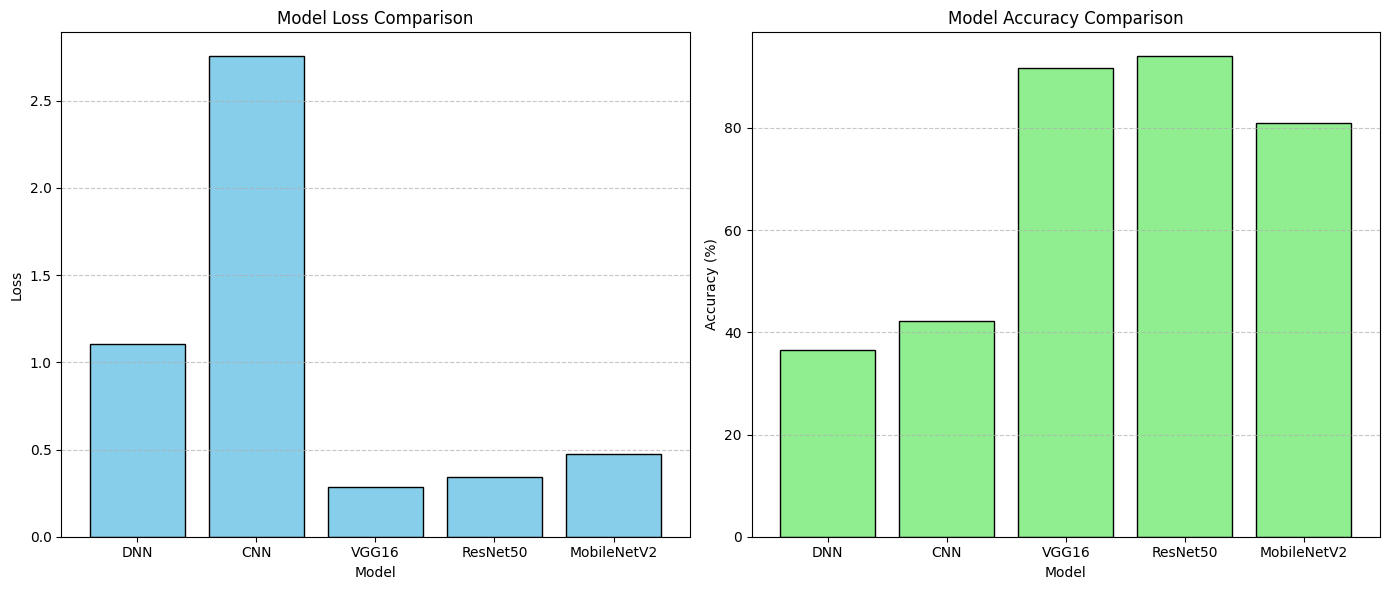

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Results dictionary from the last code
results = {
    "DNN": [1.1034, 0.3654],
    "CNN": [2.7542, 0.4219],
    "VGG16": [0.2833, 0.9169],
    "ResNet50": [0.3446, 0.9402],
    "MobileNetV2": [0.4730, 0.8106],
}

# Extract model names, losses, and accuracies
model_names = list(results.keys())
losses = [result[0] for result in results.values()]
accuracies = [result[1] * 100 for result in results.values()]  # Convert accuracy to percentage

# Set up the figure
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot Loss
ax[0].bar(model_names, losses, color='skyblue', edgecolor='black')
ax[0].set_title('Model Loss Comparison')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Model')
ax[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot Accuracy
ax[1].bar(model_names, accuracies, color='lightgreen', edgecolor='black')
ax[1].set_title('Model Accuracy Comparison')
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_xlabel('Model')
ax[1].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()
